In [7]:
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "02_ml_models/02a_machine_perception.ipynb"
_nb_title = "Flowers Image Classification using a linear model"

### no need to change any of this
_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name={1}&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F{2}&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F{2}">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name=Flowers Image Classification using a linear model&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F02_ml_models%2F02a_machine_perception.ipynb&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F02_ml_models%2F02a_machine_perception.ipynb">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/02_ml_models/02a_machine_perception.ipynb">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


# Flowers Image Classification using a linear model

We'll be using a creative-commons licensed
[flower photo dataset](https://www.tensorflow.org/datasets/catalog/tf_flowers)
of 3670 images falling into 5 categories:
<pre>
'daisy', 'roses', 'dandelion', 'sunflowers', and 'tulips'
</pre>
We have already prepared these images to be stored
in Google Cloud Storage in a public bucket:
<pre>
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/.
</pre>

The images are randomly split
into a training set with 90% data and a
test set with 10% data listed in CSV files:

Training set: [train_set.csv](https://storage.cloud.google.com/practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv)
Evaluation set: [eval_set.csv](https://storage.cloud.google.com/practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv)


## Enable GPU

This notebook and pretty much every other notebook in this repository
will run faster if you are using a GPU.
On Colab:
- Navigate to Edit→Notebook Settings
- Select GPU from the Hardware Accelerator drop-down

On Cloud AI Platform Notebooks:
- Navigate to https://console.cloud.google.com/ai-platform/notebooks
- Create an instance with a GPU or select your instance and add a GPU

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [8]:
import tensorflow as tf
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.19.0
Found GPU at: /device:GPU:0


## Let's examine these images

Let's see the first five lines of the train_set.csv
You'll notice that each line consists of a JPEG filename
and the type of flower it is.

In [16]:
!gsutil ls gs://practical-ml-vision-book/data/

You are attempting to access protected data with no configured
credentials. Please visit https://cloud.google.com/console#/project
and sign up for an account, and then run the "gcloud auth login"
command to configure gsutil to use these credentials.


In [17]:
#!gsutil cat gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/train_set.csv | head -20
import tensorflow as tf
import pathlib
import tarfile
import urllib.request

## Download the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [27]:
list(data_dir.glob('*/*'))

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/tulips'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/sunflowers')]

In [35]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)

3670


In [38]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)

CLASS_NAMES = [
    item.name
    for item in pathlib.Path(data_dir).glob("*/*")
    if item.is_dir()
]
print("These are the available classes:", CLASS_NAMES)
# CLASS_NAMES = [item.numpy().decode("utf-8") for item in
#                tf.strings.regex_replace(
#                  tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*"),
#                  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", "")]
# CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
# print("These are the available classes:", CLASS_NAMES)


These are the available classes: ['roses', 'tulips', 'dandelion', 'daisy', 'sunflowers']


In [45]:
## Read on eof the daisy image
sample_daisy_image = list(data_dir.glob('*/daisy/*'))[0]
print(sample_daisy_image)

/root/.keras/datasets/flower_photos/flower_photos/daisy/8938566373_d129e7af75.jpg


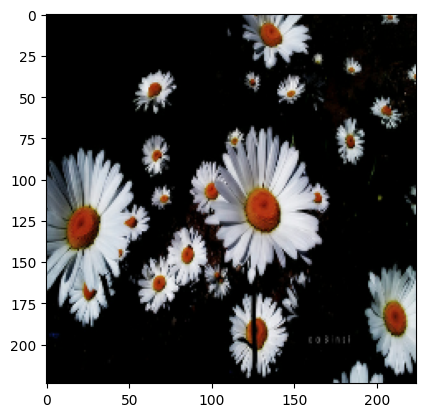

In [49]:
# Try reading and displaying one of the files
def show_image(filename):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  plt.imshow((img.numpy()));

show_image(str(sample_daisy_image))
#show_image("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg")

# Read the flowers dataset using tensforflow_datasets

In [51]:
### Reading the dataset using Tensorflow
import tensorflow_datasets as tfds
import tensorflow as tf

# Load the tf_flowers dataset
dataset, info = tfds.load("tf_flowers", with_info=True, as_supervised=True)

# Extract train split
train_ds = dataset["train"]

# Print dataset info
print("Dataset name:", info.name)
print("Number of examples:", info.splits['train'].num_examples)
print("Number of classes:", info.features['label'].num_classes)

# Example: view one sample
for image, label in train_ds.take(1):
    print("Image shape:", image.shape)
    print("Label:", label.numpy())

# # Define the batch size and image dimensions
# BATCH_SIZE = 32
# IMG_HEIGHT = 224
# IMG_WIDTH = 224

# # Create a dataset from the image files and labels
# list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

# def get_label(file_path):
#   # Convert the path to a list of path components
#   parts = tf.strings.split(file_path, os.path.sep)
#   # The second to last is the class-directory
#   return parts[-2]

# def process_path(file_path):
#   label = get_label(file_path)
#   # Load the raw data from the file as a string
#   img = tf.io.read_file(file_path)
#   img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
#   img = tf.image.convert_image_dtype(img, tf.float32)
#   img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
#   return img, label

# # Set `num_parallel_calls` so your data is loaded and processed faster.
# AUTOTUNE = tf.data.AUTOTUNE
# labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

# # Demonstrate the dataset
# for image, label in labeled_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

Dataset name: tf_flowers
Number of examples: 3670
Number of classes: 5
Image shape: (333, 500, 3)
Label: 2


In [53]:
info.features['label'].names
# # notice that the file name has the flower type in it. Let's look at a few tulips
# tulips = tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/*.jpg")
# f, ax = plt.subplots(1, 5, figsize=(15,15))
# for idx, filename in enumerate(tulips[:5]):
#   print(filename)
#   img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
#   ax[idx].imshow((img.numpy()));
#   ax[idx].axis('off')

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

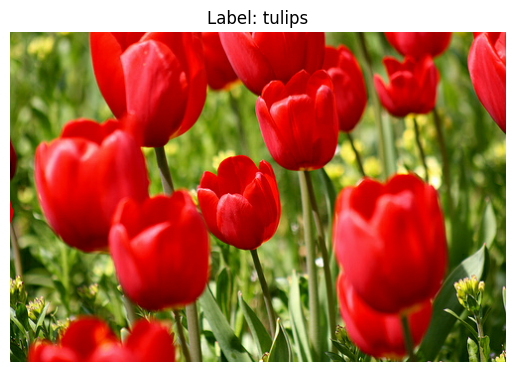

In [58]:
#train_ds.take(1)
import matplotlib.pyplot as plt
for image, label in train_ds.take(1):
   plt.imshow(image)
   plt.title(f"Label: {info.features['label'].names[label.numpy()]}")
   plt.axis('off')
   plt.show()

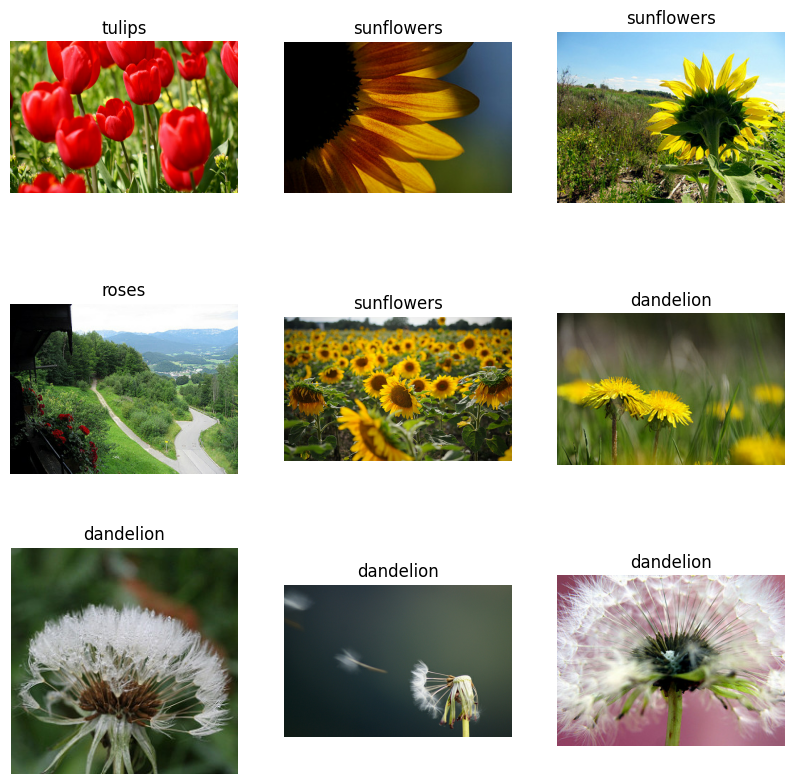

In [59]:
plt.figure(figsize=(10,10))
i = 0
for image, label in train_ds.take(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.title(info.features['label'].names[label.numpy()])
  plt.axis("off")
  i += 1
plt.show()

In [ ]:
tf.strings.split(tf.strings.regex_replace(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/10094731133_94a942463c.jpg",
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", ""),
    '/')[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'tulips'>

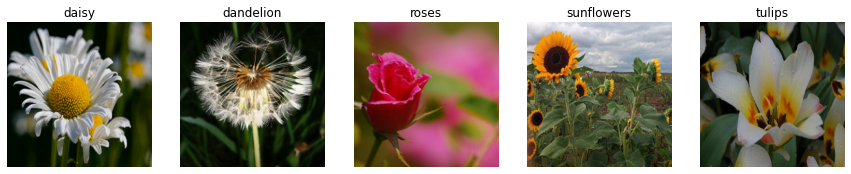

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate([
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713398906_28e59a225a_n.jpg"
]):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].set_title(CLASS_NAMES[idx])
  ax[idx].axis('off')

## A simple rule-based model

Let's get the average color of RGB values in the different
types of flowers and then classify an unknown image as
belonging to closest centroid.

In [ ]:
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  # label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label_string

dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").
    map(decode_csv))

for img, label in dataset.take(3):
  avg = tf.math.reduce_mean(img, axis=[0, 1]) # average pixel in the image
  print(label, avg)

tf.Tensor(b'daisy', shape=(), dtype=string) tf.Tensor([0.35889465 0.36257476 0.26932985], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.32278505 0.32278505 0.32278505], shape=(3,), dtype=float32)
tf.Tensor(b'dandelion', shape=(), dtype=string) tf.Tensor([0.20397638 0.13298166 0.07217269], shape=(3,), dtype=float32)


This will take a while if we do all the images,
since there are about 800 images
per type of flower. Later in the book, we will look at
ways to speed up full passes through the data.

In [ ]:
class Centroid:
  def __init__(self, label):
    self.label = label
    self.sum_so_far = tf.constant(0., dtype=tf.float32)
    self.count_so_far = 0

  def update(self, value):
    self.sum_so_far = self.sum_so_far + value
    self.count_so_far = self.count_so_far + 1
    if self.count_so_far%100 == 0:
      print(self.label, self.count_so_far)

  def centroid(self):
    return self.sum_so_far / self.count_so_far

  def __str__(self):
    return '{} {}'.format(self.label, self.centroid().numpy())


class CentroidRule:
  def __init__(self):
    self.centroids = {
        f: Centroid(f) for f in CLASS_NAMES}

  def fit(self, dataset):
    for img, label in dataset:
      label = label.numpy().decode("utf-8")
      avg = tf.reduce_mean(img, axis=[0, 1]) # average pixel in the image
      self.centroids[label].update(avg)

  def predict(self, img):
    avg = tf.reduce_mean(img, axis=[0, 1]) # average pixel in the image
    best_label = ""
    best_diff = 999
    for key, val in self.centroids.items():
      diff = tf.reduce_sum(tf.abs(avg - val.centroid()))
      if diff < best_diff:
        best_diff = best_diff
        best_label = key
    return best_label

  def evaluate(self, dataset):
    num_correct, total_images = 0, 0
    for img, label in dataset:
      correct = label.numpy().decode('utf-8')
      predicted = self.predict(img)
      if correct == predicted:
        num_correct = num_correct + 1
      total_images = total_images + 1
    accuracy = num_correct / total_images
    return(accuracy)

In [ ]:
rule = CentroidRule()

# to try it on the full dataset, remove the .take(500)
train_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").
    map(decode_csv)).take(500)

eval_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv").
    map(decode_csv)).take(50)

rule.fit(train_dataset)

# There is not much separation between the classes
print(rule.centroids['daisy'])
print(rule.centroids['roses'])

# let's evaluate it
rule.evaluate(eval_dataset)

dandelion 100
tulips 100
daisy [0.44554377 0.44968474 0.3594977 ]
roses [0.46776444 0.37675467 0.31471127]


0.24

That's pretty much a random guess!!

In [ ]:
# this is how you'd use the model to predict
filename = "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg"
img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
pred = rule.predict(img)
print(pred)

tulips


## A linear model
What if you apply different weights each of the pixels?
Let's use the Keras API

In [ ]:
# decode_csv changed so that the label is the index into CLASS_NAMES array
def decode_csv(csv_row):
  record_defaults = ["path", "flower"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

train_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv").
    map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv").
    map(decode_csv)).batch(10)

# linear model
model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
              tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 752645    
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


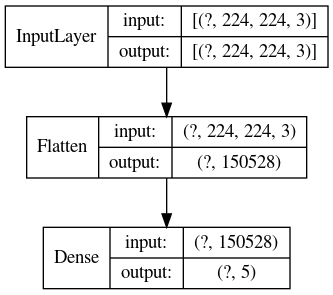

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
330/330 [==============================] - 931s 3s/step - loss: 15.9920 - accuracy: 0.3476 - val_loss: 10.3957 - val_accuracy: 0.3973
Epoch 2/10
330/330 [==============================] - 712s 2s/step - loss: 15.2134 - accuracy: 0.4055 - val_loss: 12.4511 - val_accuracy: 0.4108
Epoch 3/10
330/330 [==============================] - 632s 2s/step - loss: 12.0321 - accuracy: 0.4558 - val_loss: 27.7763 - val_accuracy: 0.3838
Epoch 4/10
330/330 [==============================] - 565s 2s/step - loss: 15.6114 - accuracy: 0.4652 - val_loss: 26.0203 - val_accuracy: 0.4000
Epoch 5/10
330/330 [==============================] - 579s 2s/step - loss: 10.3331 - accuracy: 0.5436 - val_loss: 22.7779 - val_accuracy: 0.3946
Epoch 6/10
330/330 [==============================] - 536s 2s/step - loss: 12.0866 - accuracy: 0.5306 - val_loss: 47.9555 - val_accuracy: 0.3405
Epoch 7/10
330/330 [==============================] - 521s 2s/step - loss: 16.8828 - accuracy: 0.4982 - val_loss: 24.7191 - val_ac

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

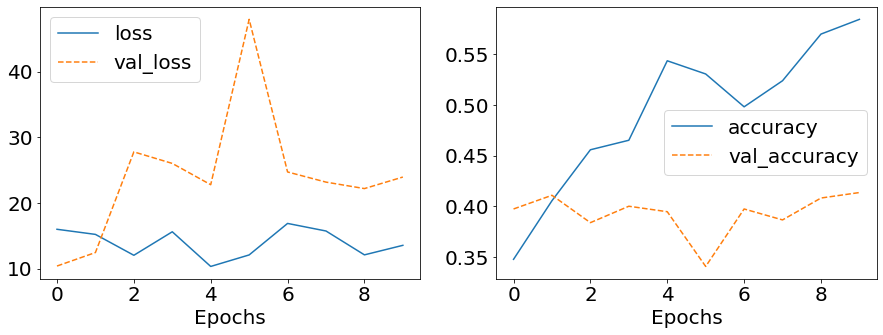

In [ ]:
training_plot(['loss', 'accuracy'], history);

[0.09405971 0.0570501  0.8488902 ]
[0.04838873 0.0721875  0.8794238 ]


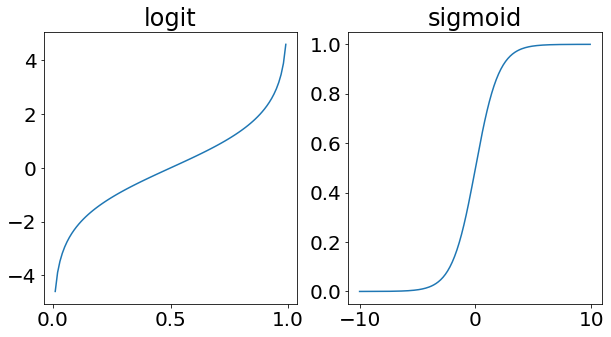

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

fig, ax = plt.subplots(1, 2, figsize=(10,5))
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x / (1-x))
ax[0].plot(x, y)
ax[0].set_title("logit")
x = np.arange(-10.0, 10.0, 0.1)
y = tf.math.sigmoid(x)
ax[1].plot(x, y);
ax[1].set_title("sigmoid")

print( tf.math.softmax([-1.0, -1.5, 1.2]).numpy() )
print( tf.math.softmax([0.1, 0.5, 3.0]).numpy() )

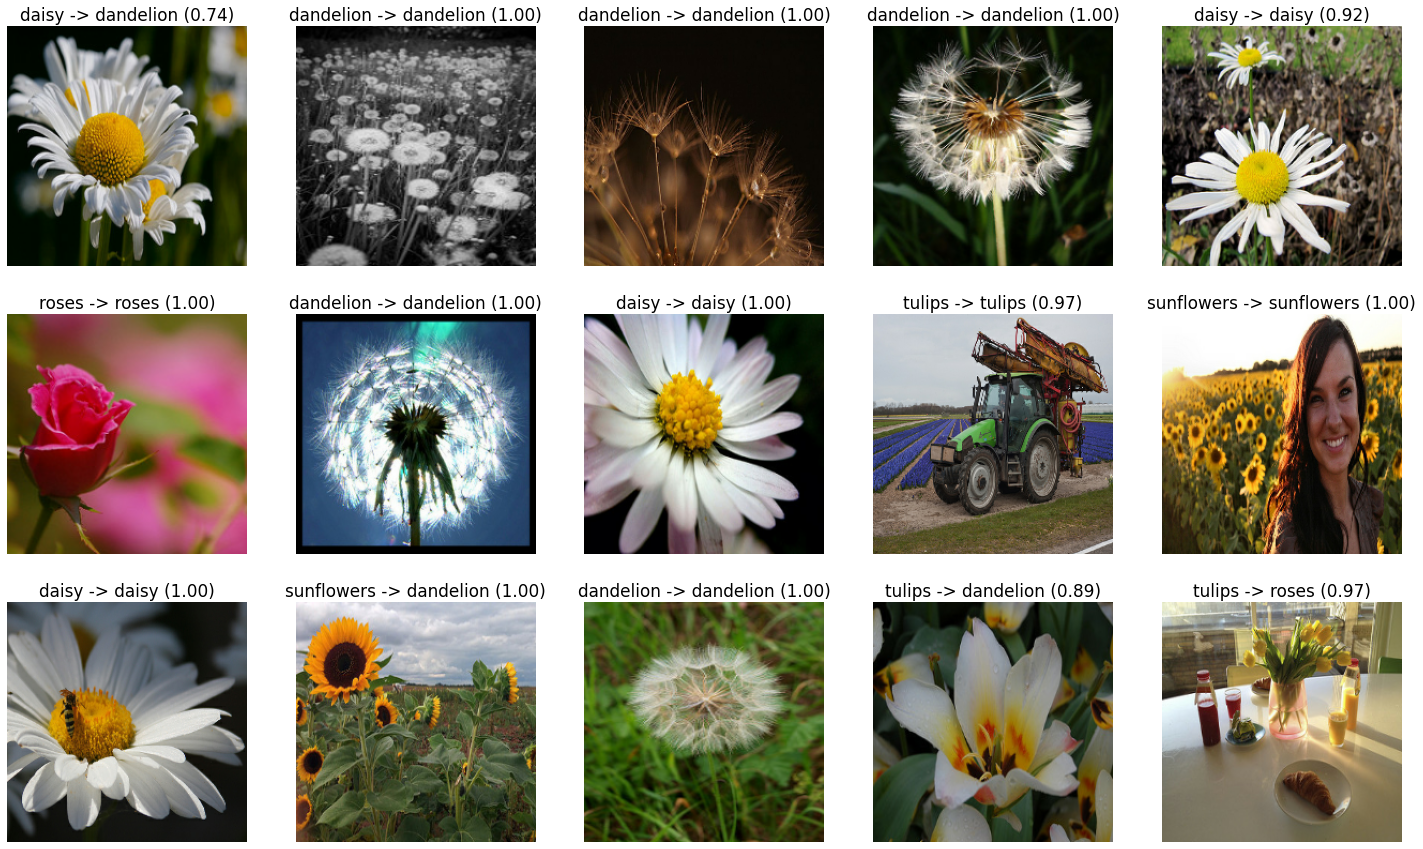

In [ ]:
# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

plot_predictions("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv")

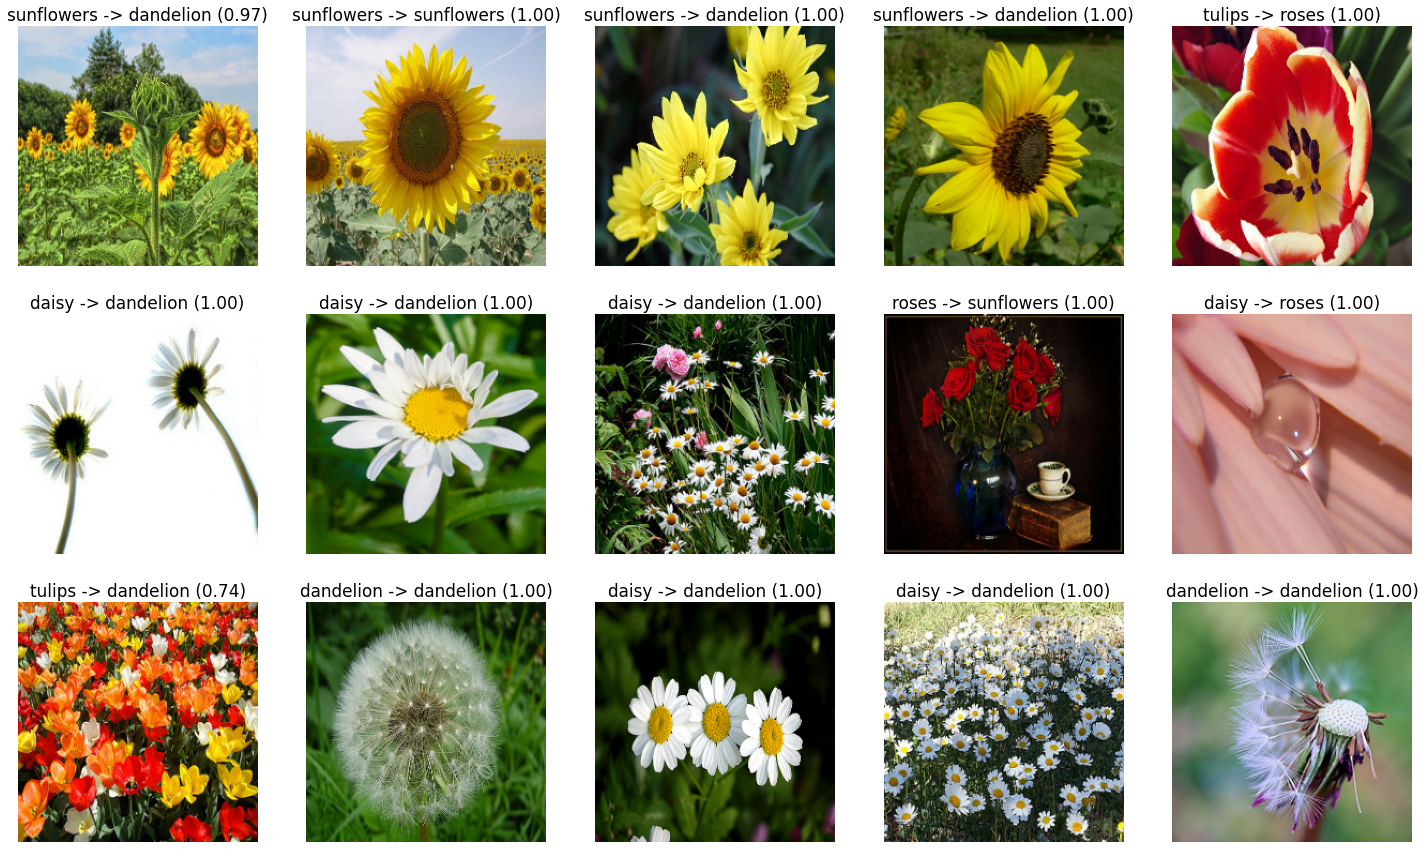

In [ ]:
plot_predictions("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/eval_set.csv")

Scaling weights for daisy in -0.1400132030248642 to 0.11755678057670593
Scaling weights for dandelion in -0.1194157525897026 to 0.1433272659778595
Scaling weights for roses in -0.11747615039348602 to 0.12644261121749878
Scaling weights for sunflowers in -0.14917171001434326 to 0.12388180941343307
Scaling weights for tulips in -0.11622291058301926 to 0.11004119366407394


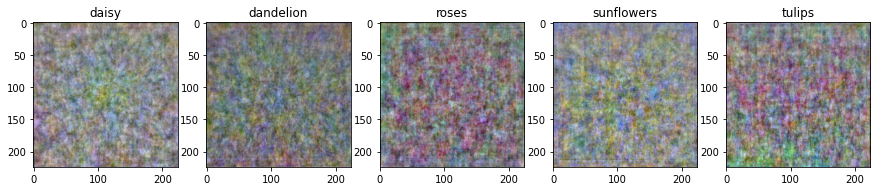

In [ ]:
def show_trained_weights(model):
  # CLASS_NAMES is ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  LAYER = 1 # Layer 0 flattens the image, layer=1 is the first dense layer
  WEIGHT_TYPE = 0 # 0 for weight, 1 for bias

  f, ax = plt.subplots(1, 5, figsize=(15,15))
  for flower in range(len(CLASS_NAMES)):
    weights = model.layers[LAYER].get_weights()[WEIGHT_TYPE][:, flower]
    min_wt = tf.math.reduce_min(weights).numpy()
    max_wt = tf.math.reduce_max(weights).numpy()
    flower_name = CLASS_NAMES[flower]
    print("Scaling weights for {} in {} to {}".format(
        flower_name, min_wt, max_wt))
    weights = (weights - min_wt)/(max_wt - min_wt)
    ax[flower].imshow(weights.reshape(IMG_HEIGHT, IMG_WIDTH, 3));
    ax[flower].set_title(flower_name);

show_trained_weights(model)

## Diagrams


[0.   0.09 0.06 0.85 0.  ] [0.         0.01696592 0.01094963 0.9720845  0.        ]
[0.09090909 0.09090909 0.6363636  0.09090909 0.09090909] [0.04651164 0.04651164 0.8139535  0.04651164 0.04651164]
[0.   0.25 0.5  0.25 0.  ] [0.         0.20000002 0.6000001  0.20000002 0.        ]
[0.08333333 0.08333333 0.3333333  0.41666666 0.08333333] [0.06113537 0.06113537 0.33624455 0.48034936 0.06113537]
[0.12499999 0.12499999 0.49999997 0.12499999 0.12499999] [0.09090909 0.09090909 0.6363636  0.09090909 0.09090909]


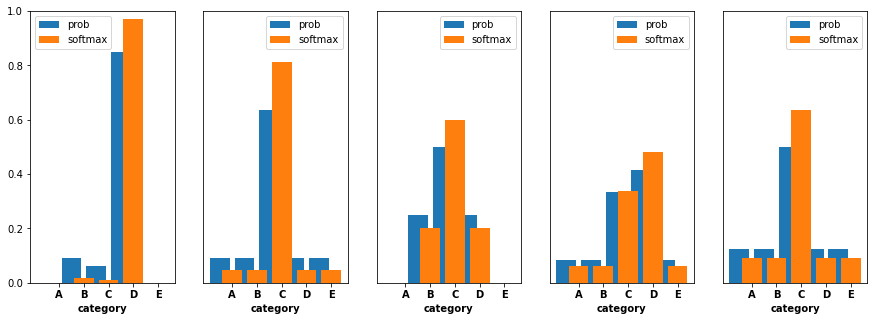

In [ ]:
import tensorflow as tf

inx = [
    [0, 0.09, 0.06, 0.85, 0],
    [0.1, 0.1, 0.7, 0.1, 0.1],
    [0, 0.2, 0.4, 0.2, 0],
    [0.1, 0.1, 0.4, 0.5, 0.1],
    [0.2, 0.2, 0.8, 0.2, 0.2],
]

def logit(x):
    return - tf.math.log(1. / x - 1.)

barWidth = 0.5
r1 = np.arange(len(inx[0]))
r2 = [x + barWidth for x in r1]

f, ax = plt.subplots(1, 5, figsize=(15,5))
for idx, x in enumerate(inx):
    prob = x / tf.reduce_sum(x)
    softmax = tf.nn.softmax(logit(prob))
    print(prob.numpy(), softmax.numpy())
    ax[idx].bar(r1, prob, label='prob')
    ax[idx].bar(r2, softmax, label='softmax')
    ax[idx].set_xlabel('category', fontweight='bold')
    ax[idx].set_xticks(r2)
    ax[idx].set_xticklabels(['A','B','C','D','E'], fontweight='bold')
    ax[idx].set_ylim([0,1])
    if idx > 0:
        ax[idx].yaxis.set_visible(False)
    ax[idx].legend()

Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.